In [1]:
import numpy as np
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import geoplot as geoplot
import geopandas as gpd
from speednav import utilities as util
import datetime

### Load all the data.

In [2]:
data = util.load_data()
data_vars  = util.DATA_VARS

### Apply some basic filters to the data.

In [3]:
# now we need to figure out some filtering plans
# filter by country, 
# location = True filters those events which have no location
# maybe additional filtering has to be done by hand outside of function
# 
# then we need a plot funciton that takes in the filtered data
# kde = True means we do kde
# kde = False means we do scatter plot

country_name = 'Liberia'# 'Sierra Leone', 'Philippines', 'Liberia'
data_country = util.filter_data(data, country_name, location=True)

##### Additional filtering

In [4]:
# remove data for events with an unspecified origin
data_filter = data_country#.loc[(data_country.O0001 != 13)]

### Plot the event maps.

/Users/annie/opt/anaconda3/envs/py38/lib/python3.8/site-packages/geoplot/geoplot.py:885: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for subgeom in geom:


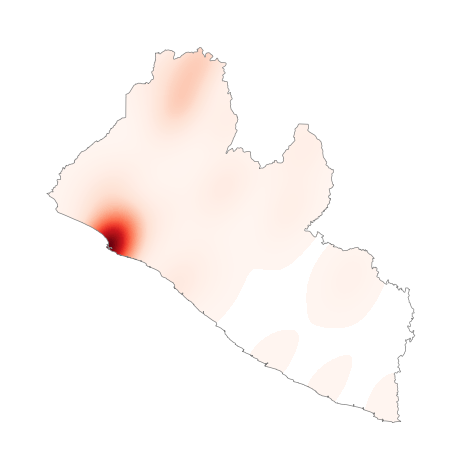

In [5]:
util.plot_event_map(data_filter, kde=True, clip_border=True)
plt.tight_layout()
plt.savefig(str(country_name) + '_kde.jpeg',dpi=300, transparent=True)

/Users/annie/opt/anaconda3/envs/py38/lib/python3.8/site-packages/geoplot/geoplot.py:885: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for subgeom in geom:


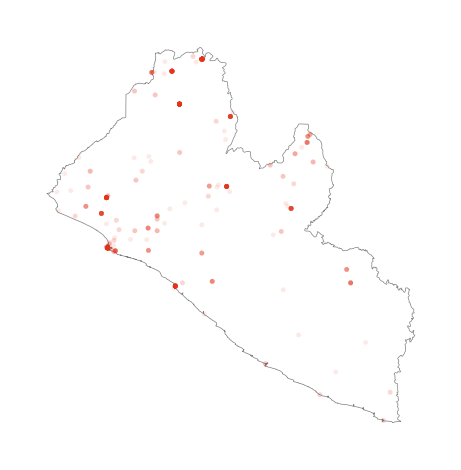

In [79]:
util.plot_event_map(data_filter, kde=False, 
                    marker_linewidth=0, 
                    color = [0.9,0.2,0.1],
                    alpha = 0.1)
plt.tight_layout()
plt.savefig(str(country_name) + '_points.jpeg', dpi=300, transparent=True)

### Plot a time series grid of maps.

##### First, define the time intervals of interest.

In [80]:
date_var = 'DL0002' # choose a time variable to use as reference. Here, it's the earliest event date

In [81]:
time_first = np.min(data_filter[date_var])
time_last = np.max(data_filter[date_var])
times = util.get_time_bins(time_first, time_last, interval='year')
print(times)

[1979 1980 1981 1982 1983 1984 1985 1986 1987 1988 1989 1990 1991 1992
 1993 1994 1995 1996 1997 1998 1999 2000 2001 2002 2003 2004 2005 2006
 2007 2008 2009]


##### Create a list of dataframes containing the data in each time interval. 

In [82]:
data_times = util.filter_times(data_filter, times, date_var=date_var, cumulative=False)

##### Plot the grid.

/Users/annie/opt/anaconda3/envs/py38/lib/python3.8/site-packages/geoplot/geoplot.py:721: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim((xmin, xmax))
/Users/annie/opt/anaconda3/envs/py38/lib/python3.8/site-packages/geoplot/geoplot.py:722: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set_ylim((ymin, ymax))
/Users/annie/opt/anaconda3/envs/py38/lib/python3.8/site-packages/geoplot/geoplot.py:885: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for subgeom in geom:
/Users/annie/opt/anaconda3/envs/py38/lib/python3.8/site-packages/geoplot/geoplot.py:885: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` proper

/Users/annie/opt/anaconda3/envs/py38/lib/python3.8/site-packages/geoplot/geoplot.py:885: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for subgeom in geom:
/Users/annie/opt/anaconda3/envs/py38/lib/python3.8/site-packages/geoplot/geoplot.py:885: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for subgeom in geom:
/Users/annie/opt/anaconda3/envs/py38/lib/python3.8/site-packages/geoplot/geoplot.py:885: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for subgeom in geom:
/Users/annie/opt/anaconda3/envs/py38/lib/python3.8/site-packages/geoplot/

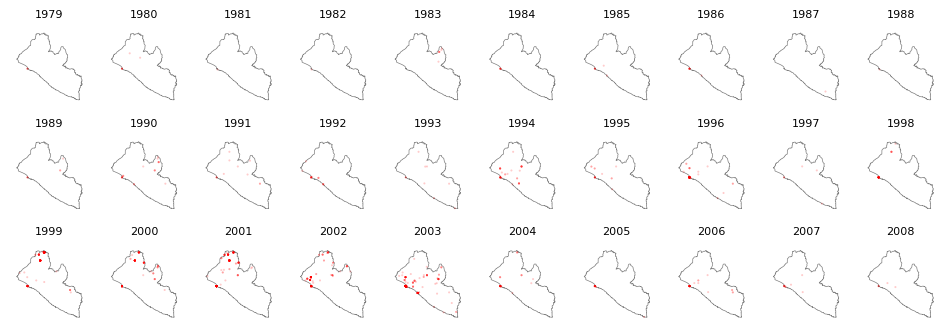

In [83]:
util.plot_map_series(data_times, titles=times, alpha=0.2, save=True)

### Plot distribution of variable differences between subsequent events

##### distance between subsequent events histogram

In [84]:
var = 'DL0010'

Calculating distance using DL0010 and DL0011


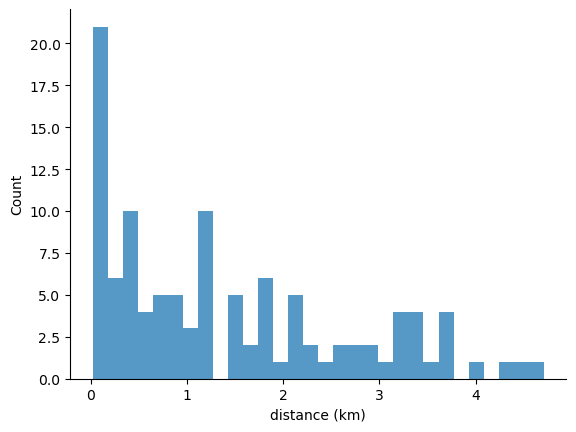

In [85]:
var_diff_subseq_ev = util.calc_var_subseq(var, data_filter)
#plt.xlim([0,5])

sns.histplot(var_diff_subseq_ev[var_diff_subseq_ev>0], 
             edgecolor=None, bins=30)
sns.despine()
plt.xlabel('distance (km)')
plt.savefig(str(country_name) + ' dist of '+ var + '.jpeg', dpi=300)
#, clip=(np.nanmin(var_diff_subseq_ev), np.max(var_diff_subseq_ev)))  #, log_scale=(False, True))

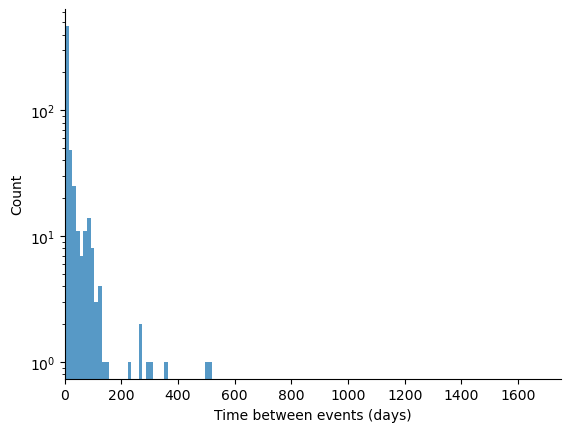

In [86]:
var = 'DL0002'

var_diff_subseq_ev = util.calc_var_subseq(var, data_filter)
plt.xlim([0,1750])

sns.histplot(var_diff_subseq_ev[var_diff_subseq_ev>0], 
             edgecolor=None, bins=40, log_scale = (False, True))
sns.despine()
plt.xlabel('Time between events (days)')
plt.savefig(str(country_name) + ' dist of subseq '+ var + '.jpeg', dpi=300)
#, clip=(np.nanmin(var_diff_subseq_ev), np.max(var_diff_subseq_ev)))  #, log_scale=(False, True))

### Plot distribution of variables for all events

1385


<AxesSubplot: ylabel='Count'>

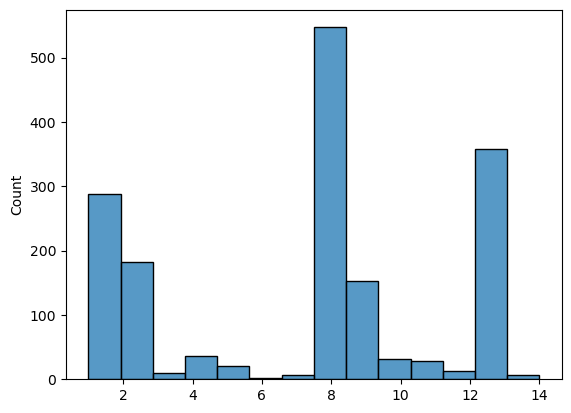

In [87]:
# distribution of origin variable
var = 'O0001'
var_values = np.array(data_filter[var])
print(len(var_values))
var_vals_float = []
for i in range(len(var_values)):
    if ',' in var_values[i]:
        var_float = var_values[i].split(",")
        for j in range(len(var_float)):
            var_vals_float.append(var_float[j])
    else: 
        var_vals_float.append(var_values[i])
var_vals_float = np.array(var_vals_float, dtype=float)

#clip = (np.nanmin(var_values), np.max(var_values))
sns.histplot(var_vals_float, bins=14)#'O0001'

[-330   -2  -25  -25]


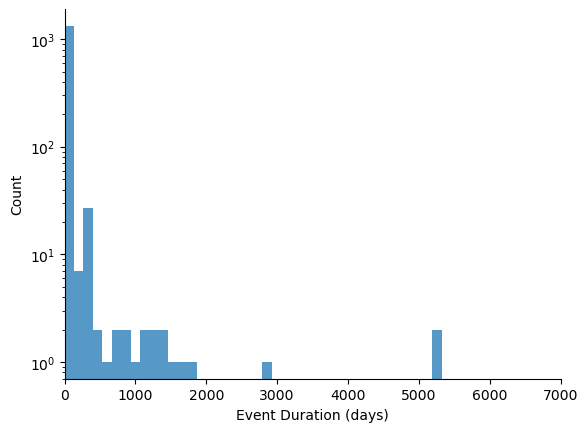

In [88]:
# distribution of event lengths
event_lengths = data_filter['DL0003']-data_filter['DL0002']
var_values = np.array(event_lengths.dt.days)
print(var_values[var_values<0])
#clip = (np.nanmin(var_values), np.max(var_values))
sns.histplot(var_values[var_values>=0], log_scale=(False, True), bins=40, edgecolor=None)
#sns.histplot(var_values[var_values>=0], bins=50, edgecolor=None)
sns.despine()
plt.xlabel('Event Duration (days)')
plt.xlim([0,7000])
plt.savefig('dist of event duration.jpeg', dpi=300)

### Plot variables as a function of time.

In [89]:
# to get rolling to work properly
# need to convert the dataframe to have each consecutive day
# days with no events will have a nan
# days with multiple events==> maybe should just take the mean? df.groupby(level=0).mean()
# then need to specify step as an integer number of days

In [94]:
# to do this we have to have a sliding window mean of the variable 
var = 'O0001'
window_size = 90 # days
step_size = 1 # days
date_var = 'DL0002'# first date

mean_vs_time = util.calc_stat_vs_time(data_filter, var, window_size, 
                                      date_var=date_var, 
                                      step=step_size, 
                                      calc_type='mean')

/Users/annie/Code/Repositories/speed-nav/speednav/utilities.py:382: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  var_date_df = var_date_df.groupby(level=0).mean()


KeyError: 'O0001'

In [ ]:
plt.plot(np.nan_to_num(np.array(mean_vs_time)))

### Plot counts as a function of time.

In [95]:
var = 'AEI0001'
window_size = 90
step_size = 1
date_var = 'DL0002'# first date
print(np.min(data_filter[date_var]))
print(np.max(data_filter[date_var]))
count_vs_time = util.calc_stat_vs_time(data_filter, var, window_size, 
                                  step=step_size, 
                                  calc_type='count')
cumulcount_vs_time = count_vs_time.cumsum()

1979-01-01 00:00:00
2008-09-07 00:00:00


['1979-01-01T00:00:00.000000' '1979-01-02T00:00:00.000000'
 '1979-01-03T00:00:00.000000' ... '2008-09-05T00:00:00.000000'
 '2008-09-06T00:00:00.000000' '2008-09-07T00:00:00.000000']


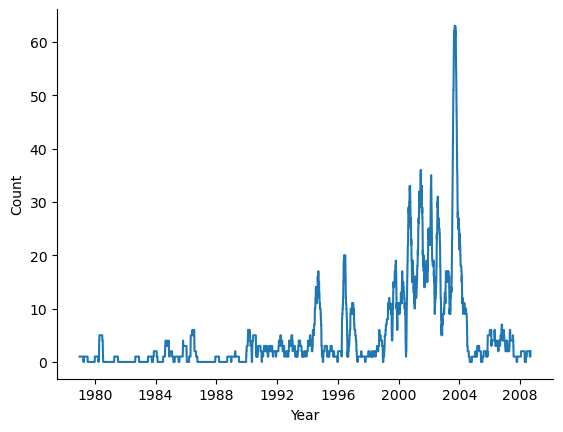

In [96]:
years = np.arange(np.min(data_filter[date_var]), np.max(data_filter[date_var])+datetime.timedelta(days=1), datetime.timedelta(days=1))
print(years)
plt.plot(years, np.array(count_vs_time))
sns.despine()
plt.xlabel('Year')
plt.ylabel('Count')
plt.savefig('count vs time' + str(country_name) + '.jpeg', dpi=300)

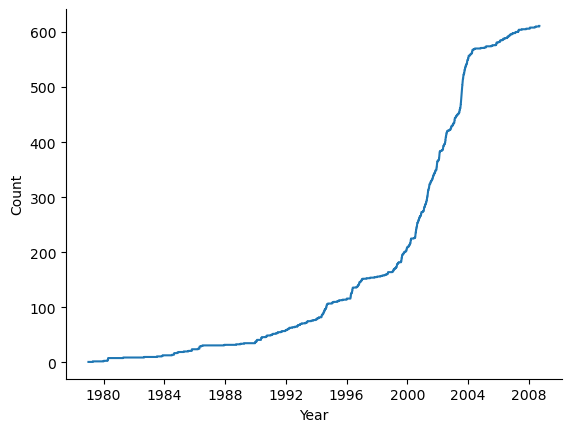

In [93]:
plt.plot(years, np.array(cumulcount_vs_time))
sns.despine()
plt.xlabel('Year')
plt.ylabel('Count')
plt.savefig('cumul count vs time' + str(country_name) + '.jpeg', dpi=300)

### Weight the kde map according to an intensity variable.

In [ ]:
util.plot_event_map(data_filter, kde=True)
plt.figure()
util.plot_event_map(data_filter, kde=True, weights_var = 'ER0005')

TODO next
1. make some slides of interesting trends to send to scott and naomi and simon

In [13]:
a = np.array([1,2,4,5,6])

In [14]:
a[0:-1]

array([1, 2, 4, 5])

In [15]:
a[1:]

array([2, 4, 5, 6])

In [16]:
a[1:]-a[0:-1]

array([1, 2, 1, 1])

In [17]:
np.diff(a)

array([1, 2, 1, 1])